In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random
import os

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))



In [4]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

The rainfall data we are looking at runs from June 6, 2000 through April 30, 2023. 12 eruptions occur in this period-- 5 at Fernandina, 2 at Cerro Azul, 3 at Sierra Negra, and 2 at Wolf. We look at 90 day averages of rainfall at each volcano site, and generate a histogram based on rain averages on eruption days.

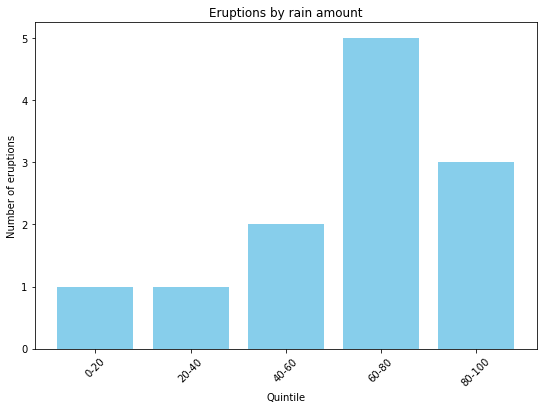

In [5]:
# Combine all
volcanos = {'Fernandina': (-91.55, -.35), 'Azul, Cerro': (-91.35, -.95), 'Negra, Sierra': (-91.15, -.85), 'Wolf': (-91.35, .05), 'Alcedo': (-91.15, -.45)}
picks = ['Fernandina', 'Azul, Cerro', 'Negra, Sierra', 'Wolf'] #choose volcano(s)

plt.figure(figsize=(9,6))

categories = ['0-20', '20-40', '40-60', '60-80', '80-100']
values = [0,0,0,0,0]

for i in picks:
    erupt_dates = np.array(eruptions['Start'][(eruptions['Volcano'] == i) & (eruptions['Start'] >= '2000')])
    rolling_rain = rainfall[(rainfall['Longitude'] == volcanos[i][0]) & (rainfall['Latitude'] == volcanos[i][1])].copy()
    rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
    rolling_rain = rolling_rain.dropna()    
    all_rain = list(rolling_rain.sort_values(by=['roll90'])['Date'])
    fifth = len(all_rain) // 5
    for l in erupt_dates:
        values[all_rain.index(l) // fifth] += 1                 
        
plt.bar(categories, values, color='skyblue')
plt.xlabel("Quintile")
plt.ylabel("Number of eruptions")
plt.title("Eruptions by rain amount")
plt.xticks(rotation=45) 
plt.show()

8 out of 12 eruptions (66%) occur in the top 40% rainiest days. There are more eruptions in the 60-80 quintile than the 80-100 quintile, which we believe is due to existence of extended dry periods at volcano sites. In particular, the Fernandina eruptions in 2005 and 2009 and the first Sierra Negra eruption of 2005 occur in the 60-80 quintile of rain, but occur in years that have no days from the 80-100 quintile. Hence these 3 eruptions should be thought of as occuring in the rainiest period within that local time frame.

Below, we plot rainfall at both volcano sites, and color code rain quintiles-- yellow being the 80-100 quintile, black being the 60-80 quintile and red being the 40-60 quintile.

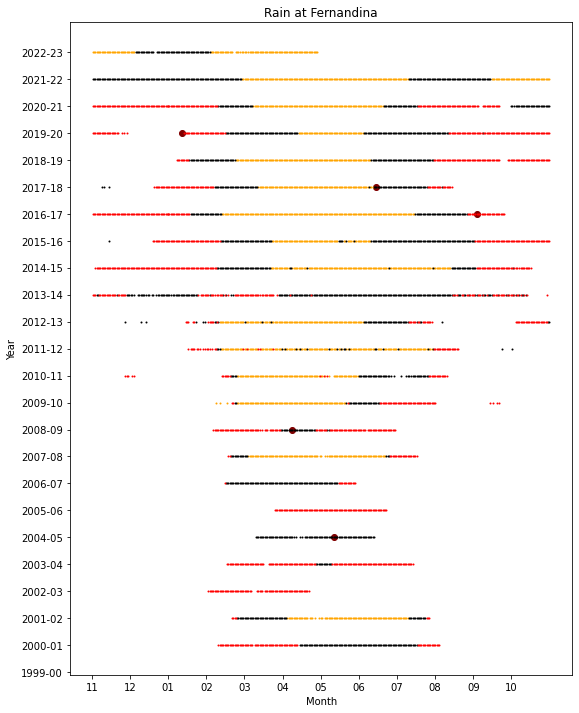

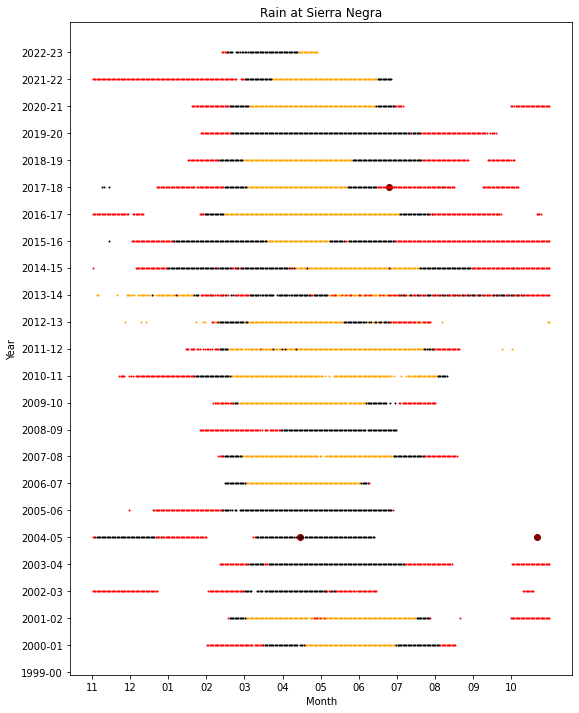

In [10]:
# Generates the rainy season plot
volcanos = {'Fernandina': (-91.55, -.35, 'Fernandina'), 'Azul, Cerro': (-91.35, -.95, 'Cerro Azul'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Wolf': (-91.35, .05, 'Wolf'), 'Alcedo': (-91.15, -.45, 'Alcedo')}
picks = ['Fernandina', 'Negra, Sierra']
eruptions['Decimal'] = eruptions.Start.apply(date_to_decimal_year)

for pick in picks:
    
    erupt_dates = np.array(eruptions['Decimal'][(eruptions['Volcano'] == pick) & (eruptions['Start'] >= '2000')])
    rolling_galapagos = rainfall[(rainfall['Longitude'] == volcanos[pick][0]) & (rainfall['Latitude'] == volcanos[pick][1])].copy()
    rolling_galapagos['roll90'] = rolling_galapagos.Precipitation.rolling(90).mean()
    rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)
    rolling_galapagos = rolling_galapagos.dropna()

    plt.figure(figsize=(9,12))

    volc_x = [((i + (2/12)) % 1) for i in erupt_dates]
    volc_y = [(i + (2/12)) // 1 for i in erupt_dates]
    labels = list(eruptions['Volcano'][(eruptions['Start'] >= '2004-11-01') & (eruptions['Volcano'] == pick)])
    plt.scatter(volc_x, volc_y, color='maroon')

    dates = rolling_galapagos.sort_values(by=['roll90'])['Decimal']
    x = np.array((dates + (2/12)) % 1)
    y = np.array((dates + (2/12)) // 1)
    bin_size = len(x) // 5
    plt.scatter(x[-bin_size:], y[-bin_size:], color='orange', s =1)
    plt.scatter(x[-(2*bin_size):-bin_size], y[-(2*bin_size):-bin_size], color='black', s =1)
    plt.scatter(x[-(3*bin_size):-(2*bin_size)], y[-(3*bin_size):-(2*bin_size)], color='red', s =1)


    plt.yticks([2000+k for k in range(24)], [str(1999+k) + '-' + str(2000+k)[2:4] for k in range(24)])
    plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
    plt.xlabel("Month") 
    plt.ylabel("Year") 
    plt.title('Rain at ' + volcanos[pick][2]) 
    plt.show() 